In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [88]:
data = pd.read_csv('smartphones.csv')
data

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,realme,Model_X_21,65525,91.0,True,False,False,dimensity,8.0,3.0,...,120,3,1.0,android,50.0,32.0,0,1024.0,1080,2460
1001,vivo,Model_X_22,58652,81.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,64.0,32.0,0,NaN,1080,2460
1002,realme,Model_X_23,18479,86.0,True,True,False,dimensity,8.0,2.0,...,60,3,1.0,android,50.0,16.0,0,NaN,1080,2400
1003,samsung,Model_X_24,41851,87.0,True,False,True,dimensity,8.0,2.2,...,120,3,1.0,android,108.0,32.0,1,1024.0,1080,2460


In [89]:
print("Dataset Overview: ")
print(data.info())
print("\nDataset Description: ")
print(data.describe())

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 1005 non-null   object 
 1   model                      1005 non-null   object 
 2   price                      1005 non-null   int64  
 3   rating                     904 non-null    float64
 4   has_5g                     1005 non-null   bool   
 5   has_nfc                    1005 non-null   bool   
 6   has_ir_blaster             1005 non-null   bool   
 7   processor_brand            985 non-null    object 
 8   num_cores                  999 non-null    float64
 9   processor_speed            963 non-null    float64
 10  battery_capacity           994 non-null    float64
 11  fast_charging_available    1005 non-null   int64  
 12  fast_charging              794 non-null    float64
 13  ram_capacity               10

In [90]:
data.duplicated().sum()

0

In [91]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                491
resolution_width               0
resolution_height              0
dtype: int64

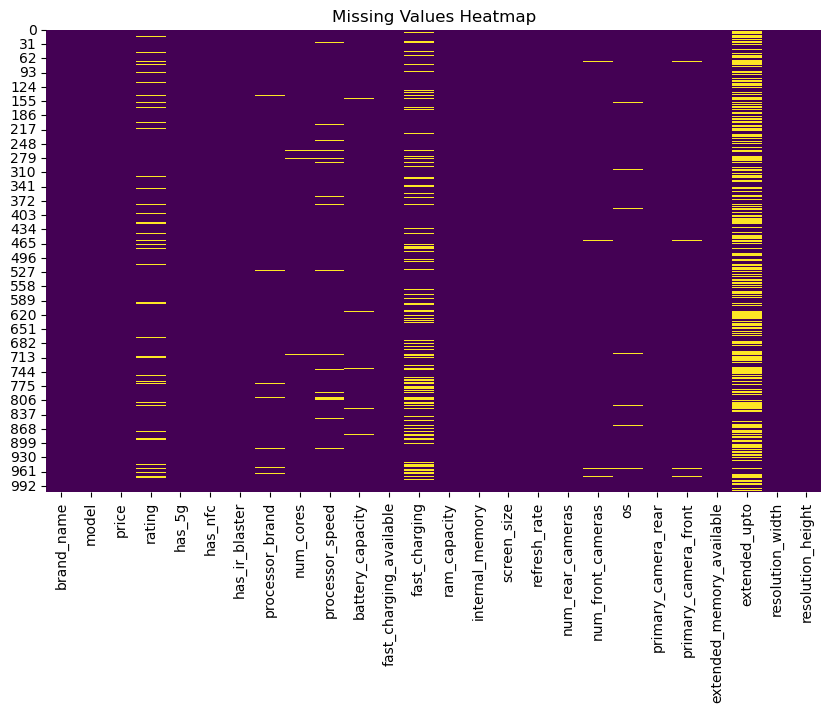

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar = False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [93]:
data_cleaned = data.dropna()


In [94]:
data.isnull().sum()


brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                491
resolution_width               0
resolution_height              0
dtype: int64

In [95]:
data = data.dropna(axis=1)


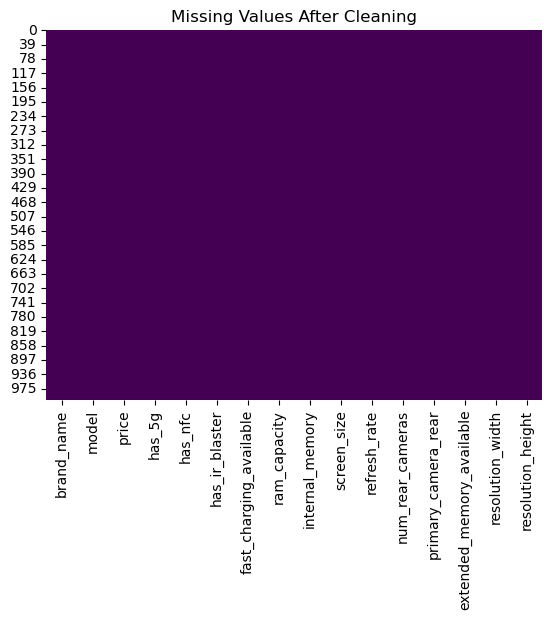

In [96]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Cleaning")
plt.show()

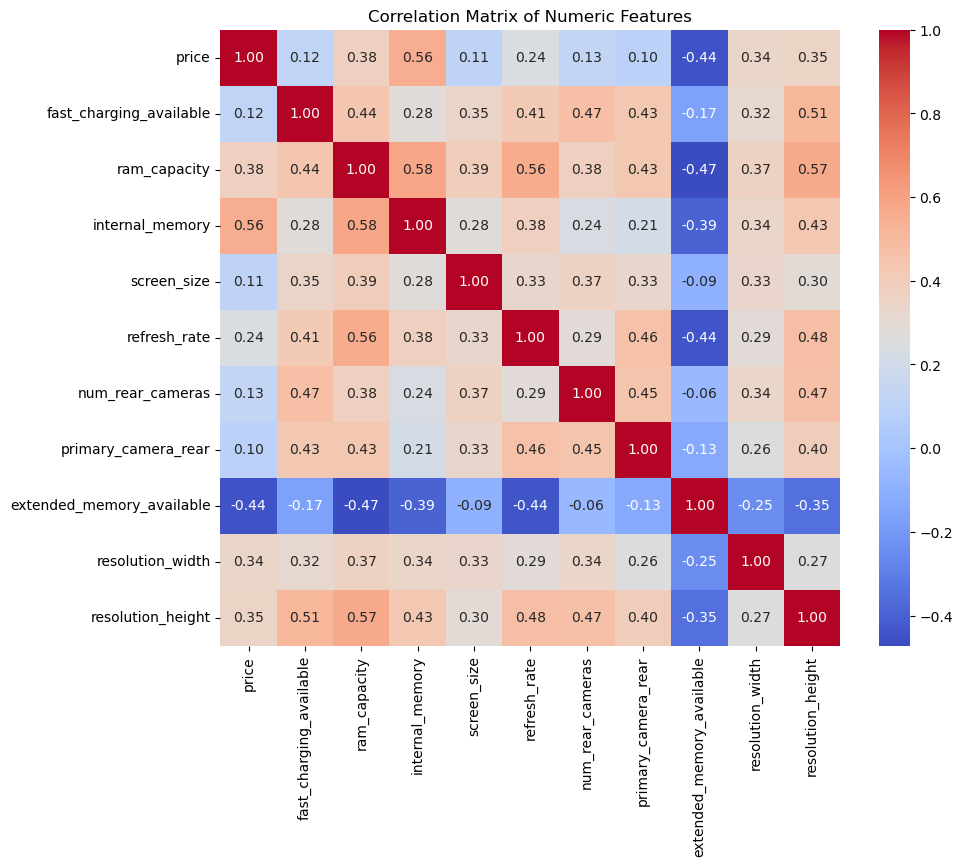

In [97]:
# Heatmap of correlation matrix

plt.figure(figsize=(10,8))

numeric_features = data.select_dtypes(include=["int64", "float64"])

correlation_matrix = numeric_features.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix of Numeric Features")
plt.show()


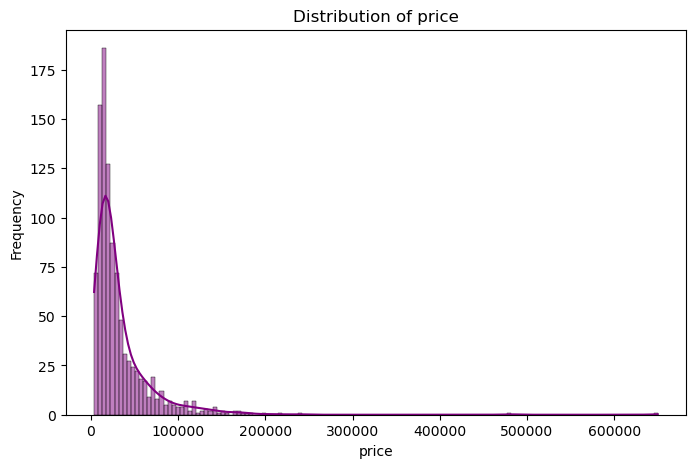

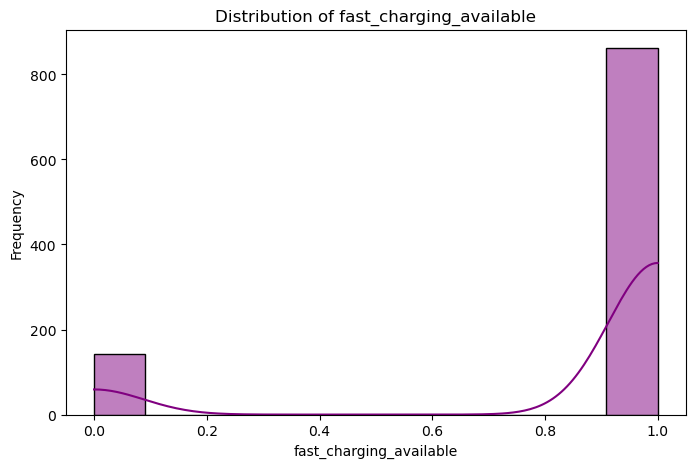

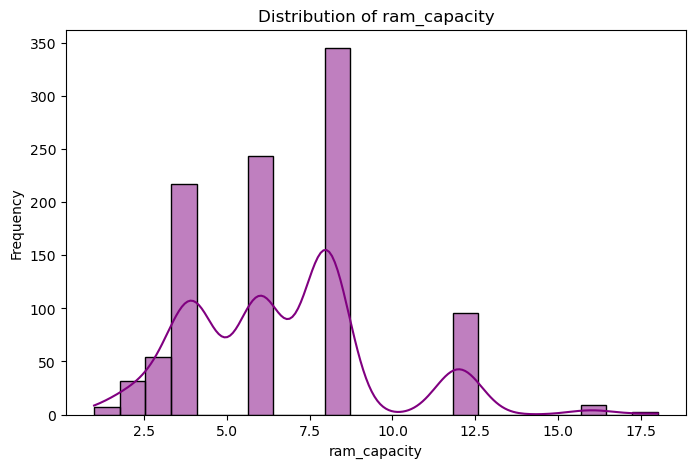

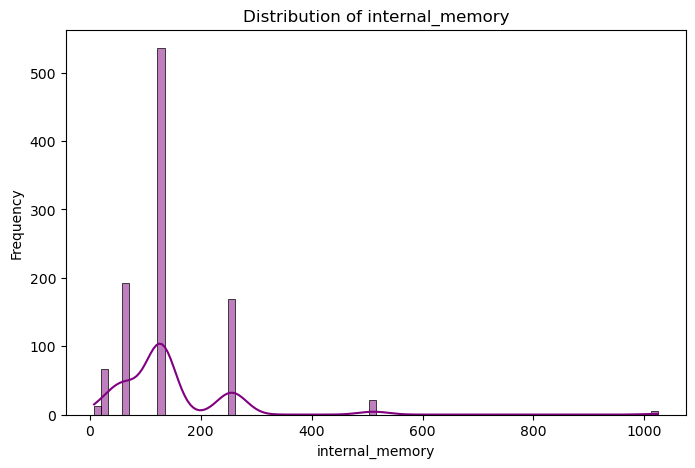

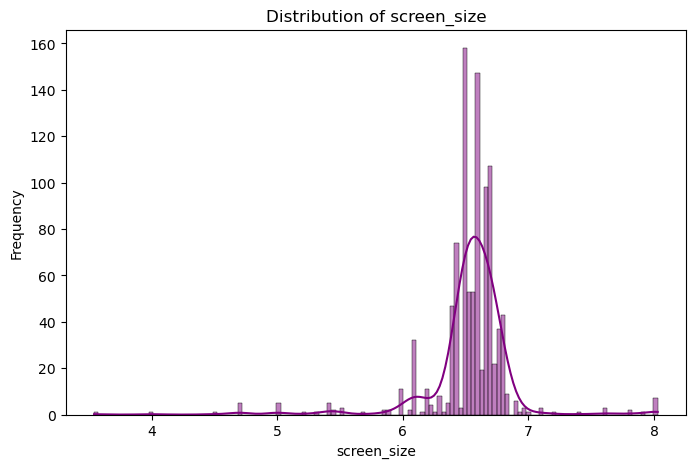

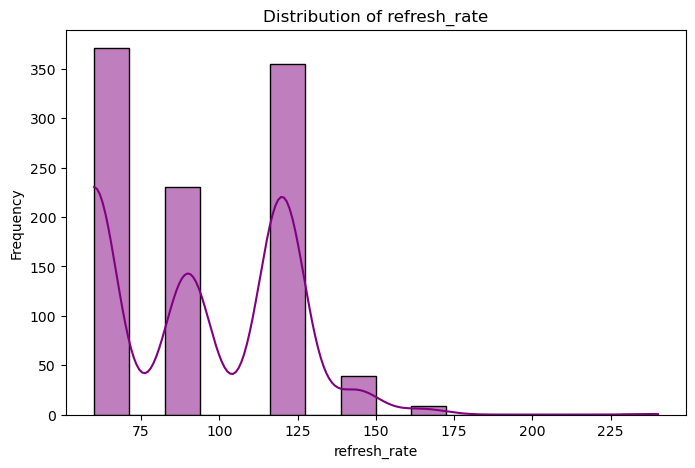

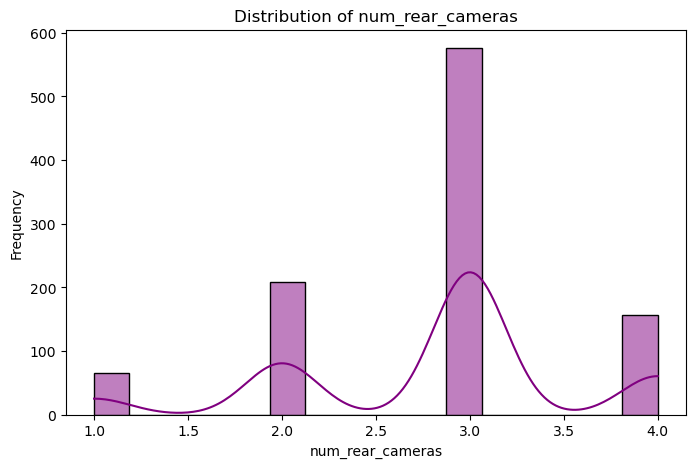

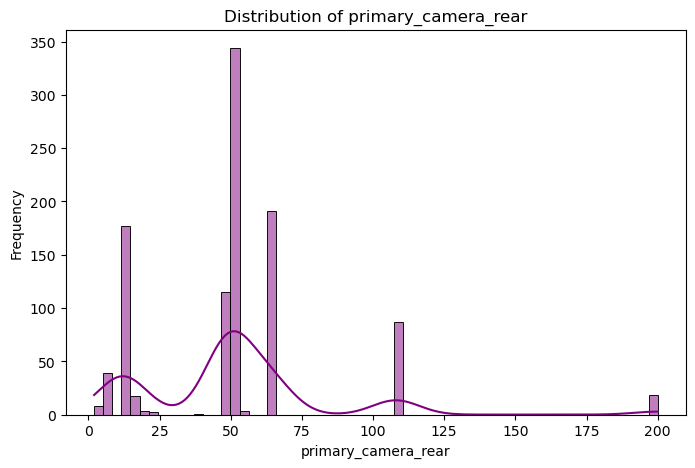

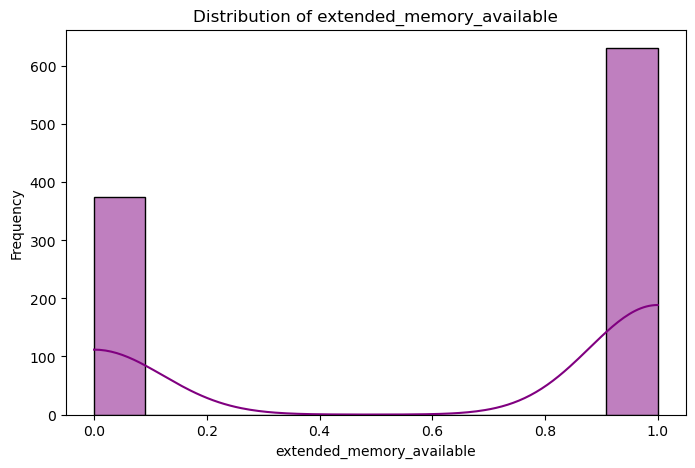

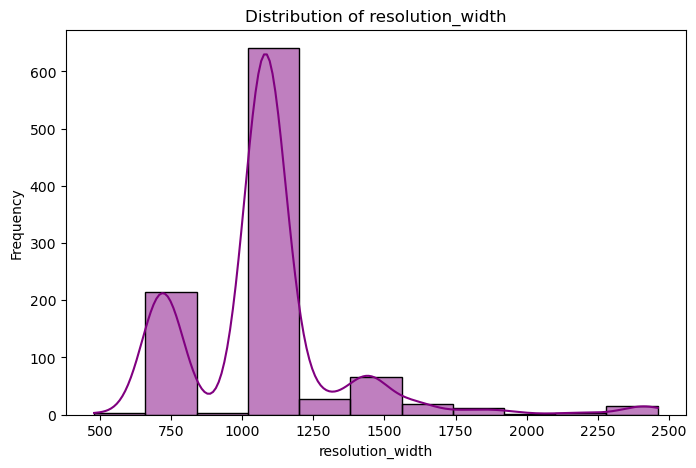

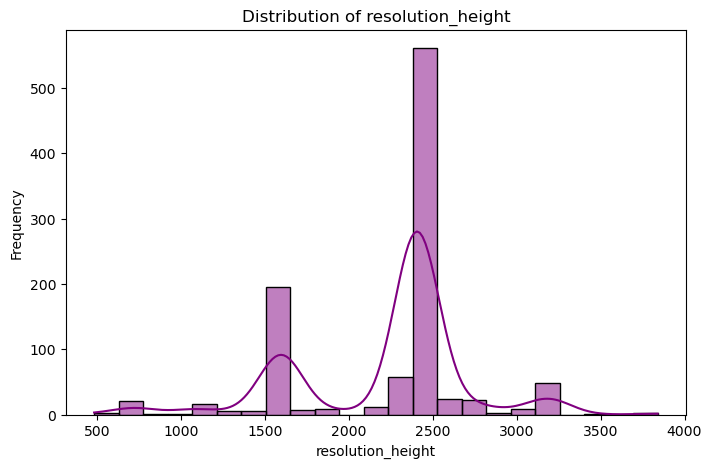

In [98]:
for column in numeric_features.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data[column],kde=True, color='purple')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [107]:
print(data.columns)

Index(['brand_name', 'model', 'price', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras',
       'primary_camera_rear', 'extended_memory_available', 'resolution_width',
       'resolution_height'],
      dtype='object')


In [109]:
X = data.drop(columns=['price','model'])
y=data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (804, 14)
Testing set size: (201, 14)


In [113]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])



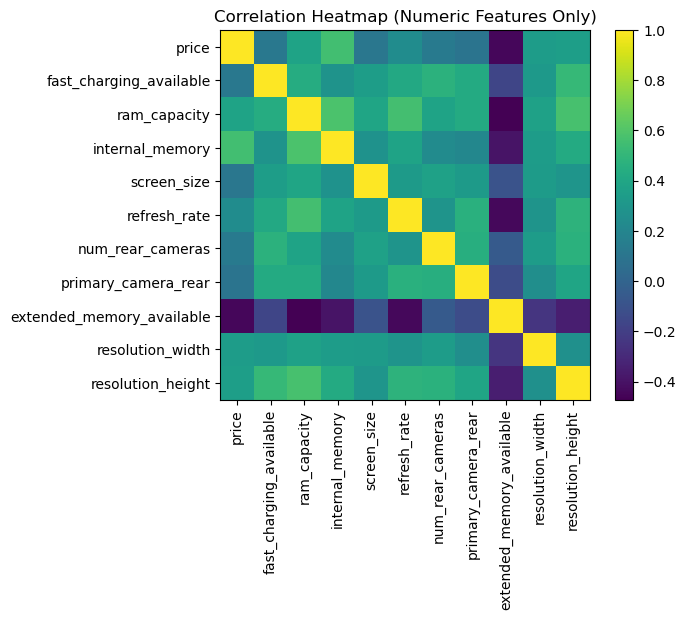

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [ ]:
print(data.columns)

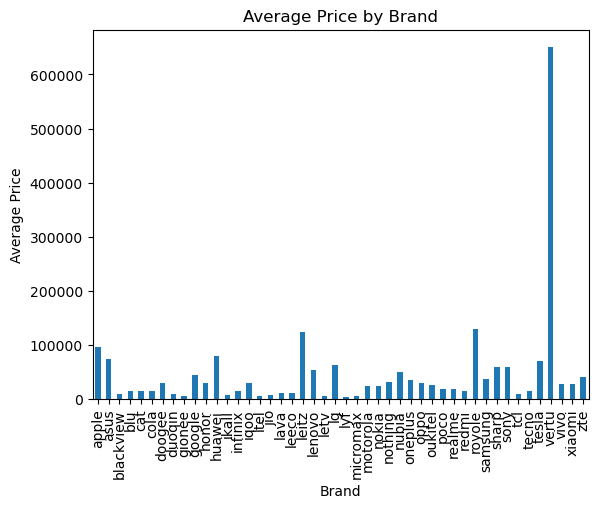

In [117]:
# Group by brand and calculate mean price
brand_price = data.groupby("brand_name")["price"].mean()

plt.figure()
brand_price.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Price by Brand")
plt.show()


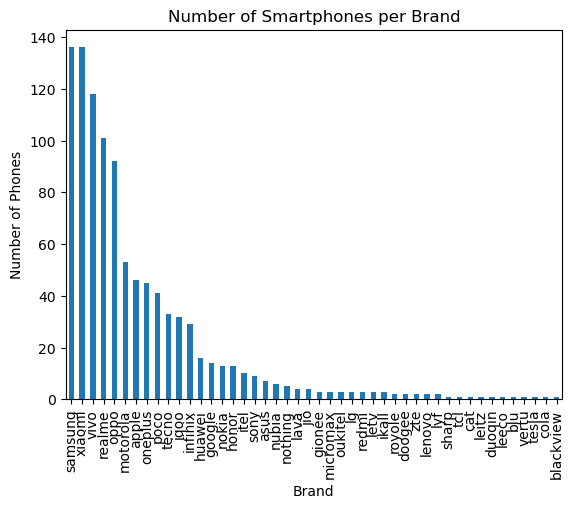

In [119]:
brand_count = data["brand_name"].value_counts()

plt.figure()
brand_count.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Number of Phones")
plt.title("Number of Smartphones per Brand")
plt.show()


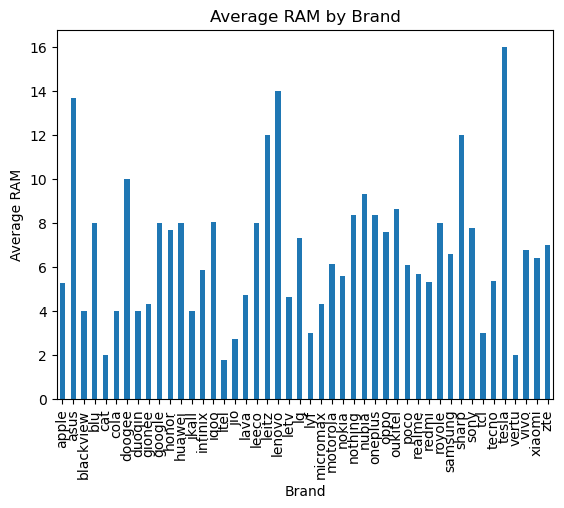

In [121]:
ram_by_brand = data.groupby("brand_name")["ram_capacity"].mean()

plt.figure()
ram_by_brand.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Average RAM")
plt.title("Average RAM by Brand")
plt.show()


In [123]:
#KNN

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_scaled, y)


KNeighborsRegressor()

In [125]:
#Decission Tree

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [127]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestRegressor(random_state=42)

In [139]:
tree.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)


ValueError: could not convert string to float: 'samsung'

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
tree_pred = tree.predict(X_test)
knn_pred = knn.predict(X_test_scaled)
rf_pred = rf.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(Y_test, tree_pred))
print("KNN MAE:", mean_absolute_error(Y_test, knn_pred))
print("Random Forest MAE:", mean_absolute_error(Y_test, rf_pred))


ValueError: could not convert string to float: 'nokia'

In [129]:
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100,random_state=42 )
}